In [1]:
#Install Tensorflow
import tensorflow as tf

from tensorflow.keras.layers import Input,Dense,SimpleRNN, GRU,LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test,y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape: ", x_train.shape)
print("x_test.shape: ", x_test.shape)

x_train.shape:  (60000, 28, 28)
x_test.shape:  (10000, 28, 28)


In [7]:
#Build the model:
i =Input(shape= x_train[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation= 'softmax')(x)

model = Model(i,x)

In [8]:
#Compile and train
model.compile(optimizer= 'adam', loss ='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.3480 - accuracy: 0.8887 - val_loss: 0.1321 - val_accuracy: 0.9614
Epoch 2/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1100 - accuracy: 0.9676 - val_loss: 0.0960 - val_accuracy: 0.9709
Epoch 3/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0759 - accuracy: 0.9776 - val_loss: 0.0657 - val_accuracy: 0.9786
Epoch 4/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0584 - accuracy: 0.9824 - val_loss: 0.0610 - val_accuracy: 0.9811
Epoch 5/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0476 - accuracy: 0.9852 - val_loss: 0.0537 - val_accuracy: 0.9833
Epoch 6/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0377 - accuracy: 0.9886 - val_loss: 0.0513 - val_accuracy: 0.9841
Epoch 7/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0329 - accuracy: 0.9897 - val_loss: 0.0473 -

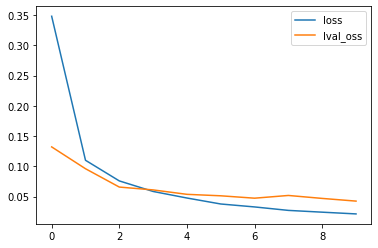

In [9]:
#Plot loss per iteration
plt.plot(r.history['loss'], label= 'loss')
plt.plot(r.history['val_loss'], label= 'validation_loss')
plt.legend()

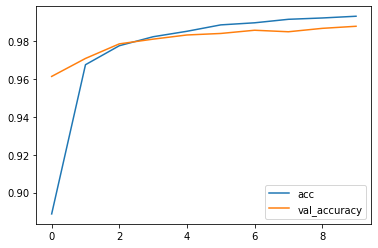

In [10]:
#Plot accuracy per iteration
plt.plot(r.history['accuracy'], label= 'accuracy')
plt.plot(r.history['val_accuracy'], label= 'validation_accuracy')
plt.legend()

In [15]:
#Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm,classes, normalize = False, title='Confusion Matrix', cmap= plt.cm.Blues):
  """
  This function prints and plots the confusion matrix. Normalization can be applied by setting 'normalization = True'
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis =1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion Matrix, without normalization')
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() /2.
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,  format(cm[i,j],fmt), horizontalalignment = 'center', color = 'white' if cm[i,j] > thresh else 'black')
  
  plt.tight_layout()
  plt.ylabel=('True Label')
  plt.xlabel=('Predicted Label')
  plt.show()



Confusion Matrix, without normalization
[[ 975    0    0    0    1    0    1    1    1    1]
 [   0 1132    1    0    0    0    2    0    0    0]
 [   3    2 1021    0    3    0    2    1    0    0]
 [   0    0   10  985    0    4    0    6    3    2]
 [   1    0    1    0  972    0    2    1    1    4]
 [   1    0    0    4    0  881    1    1    0    4]
 [   3    4    0    0    1    2  948    0    0    0]
 [   1    5   11    0    4    0    0 1004    0    3]
 [   0    0    2    3    2    3    0    2  961    1]
 [   2    0    0    0    3    1    0    2    1 1000]]


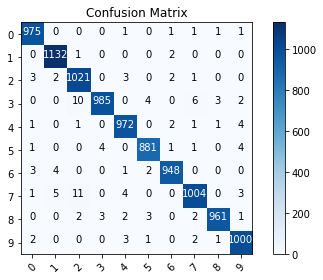

In [16]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm,list(range(10)))



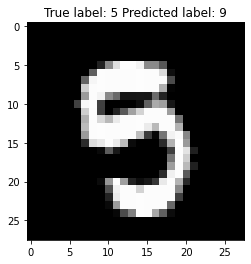

In [22]:
###Show some misclassified examples
#Create an array of misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
#Choose random from them
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title('True label: %s Predicted label: %s' % (y_test[i], p_test[i]));